In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('p3.csv',delim_whitespace=True)

In [19]:
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.scatter(Xs,Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.scatter(pf_X, pf_Y, color = 'r')
    plt.plot(pf_X, pf_Y, color = 'r', label = 'Pareto Front')



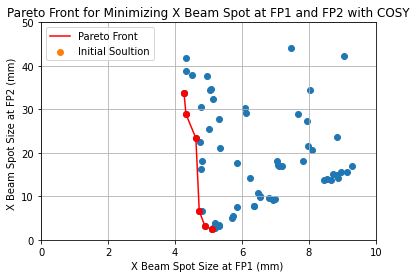

In [25]:
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)
plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')
plt.scatter(df['col1'][0]*1000,df['col2'][0]*1000, label = 'Initial Soultion')
plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(0,10)
plt.ylim(0,50)
plt.legend()